# starting from Tutorial

In [14]:
import matplotlib.pyplot as plt
import pesummary
from pesummary.io import read
import h5py
import numpy as np
import corner
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, normaltest, anderson
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [15]:
file_name = "../data/IGWN-GWTC3p0-v1-GW200112_155838_PEDataRelease_mixed_cosmo.h5"

In [16]:
with h5py.File(file_name, "r") as f:
    print("H5 data sets:")
    print(list(f))

H5 data sets:
['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']


In [17]:
data = read(file_name)
samples_dict = data.samples_dict
posterior_samples = samples_dict["C01:Mixed"]

2022-09-14  10:39:39 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2022-09-14  10:39:39 PESummary WARNING : Could not find delta_f in input file and one was not passed from the command line. Using 0.00390625Hz as default
2022-09-14  10:39:39 PESummary WARNING : Could not find minimum frequency in input file and one was not passed from the command line. Using 20.0Hz as default


In [18]:
parameters = posterior_samples.parameters
print(parameters[:10])

['symmetric_mass_ratio', 'phi_2', 'total_mass_source', 'inverted_mass_ratio', 'peak_luminosity', 'luminosity_distance', 'final_mass', 'cos_theta_jn', 'spin_2x', 'spin_1x']


In [19]:
parameters, len(parameters)

(['symmetric_mass_ratio',
  'phi_2',
  'total_mass_source',
  'inverted_mass_ratio',
  'peak_luminosity',
  'luminosity_distance',
  'final_mass',
  'cos_theta_jn',
  'spin_2x',
  'spin_1x',
  'cos_iota',
  'chirp_mass',
  'phi_jl',
  'mass_1',
  'psi',
  'mass_2',
  'tilt_2',
  'spin_1z',
  'spin_2y',
  'a_1',
  'chirp_mass_source',
  'cos_tilt_2',
  'mass_2_source',
  'log_likelihood',
  'a_2',
  'iota',
  'mass_1_source',
  'radiated_energy',
  'mass_ratio',
  'chi_eff',
  'final_mass_source',
  'phase',
  'theta_jn',
  'spin_2z',
  'phi_1',
  'chi_p',
  'dec',
  'phi_12',
  'total_mass',
  'ra',
  'spin_1y',
  'tilt_1',
  'cos_tilt_1',
  'comoving_distance',
  'final_spin',
  'redshift',
  'tilt_1_infinity_only_prec_avg',
  'tilt_2_infinity_only_prec_avg',
  'chi_p_2spin',
  'spin_1z_infinity_only_prec_avg',
  'spin_2z_infinity_only_prec_avg',
  'chi_eff_infinity_only_prec_avg',
  'chi_p_infinity_only_prec_avg',
  'beta',
  'psi_J',
  'cos_tilt_1_infinity_only_prec_avg',
  'cos_til

# New Stuff
# Check mass combinations

In [20]:
for parameter in parameters:
    if "mass" in parameter.description or "mass" in parameter:
        print(parameter)
        print(f"{parameter}: {parameter.description}")

symmetric_mass_ratio
symmetric_mass_ratio: a definition of mass ratio which is independent of the identity of the primary/secondary object
total_mass_source
total_mass_source: the source-frame combined mass of the primary and secondary masses 
inverted_mass_ratio
inverted_mass_ratio: The inverted ratio of the binary component masses. Note that normal convention is mass ratio less than 1, but here the inverted mass ratio is always bigger than 1
final_mass
final_mass: the detector-frame remnant mass estimated using the spins evolved to the ISCO frequency
chirp_mass
chirp_mass: the detector-frame chirp mass
mass_1
mass_1: the detector-frame (redshifted) mass of the heavier object
mass_2
mass_2: the detector-frame (redshifted) mass of the lighter object
chirp_mass_source
chirp_mass_source: the source-frame chirp mass
mass_2_source
mass_2_source: the source mass of the lighter object in the binary
mass_1_source
mass_1_source: the source mass of the heavier object in the binary
radiated_ener

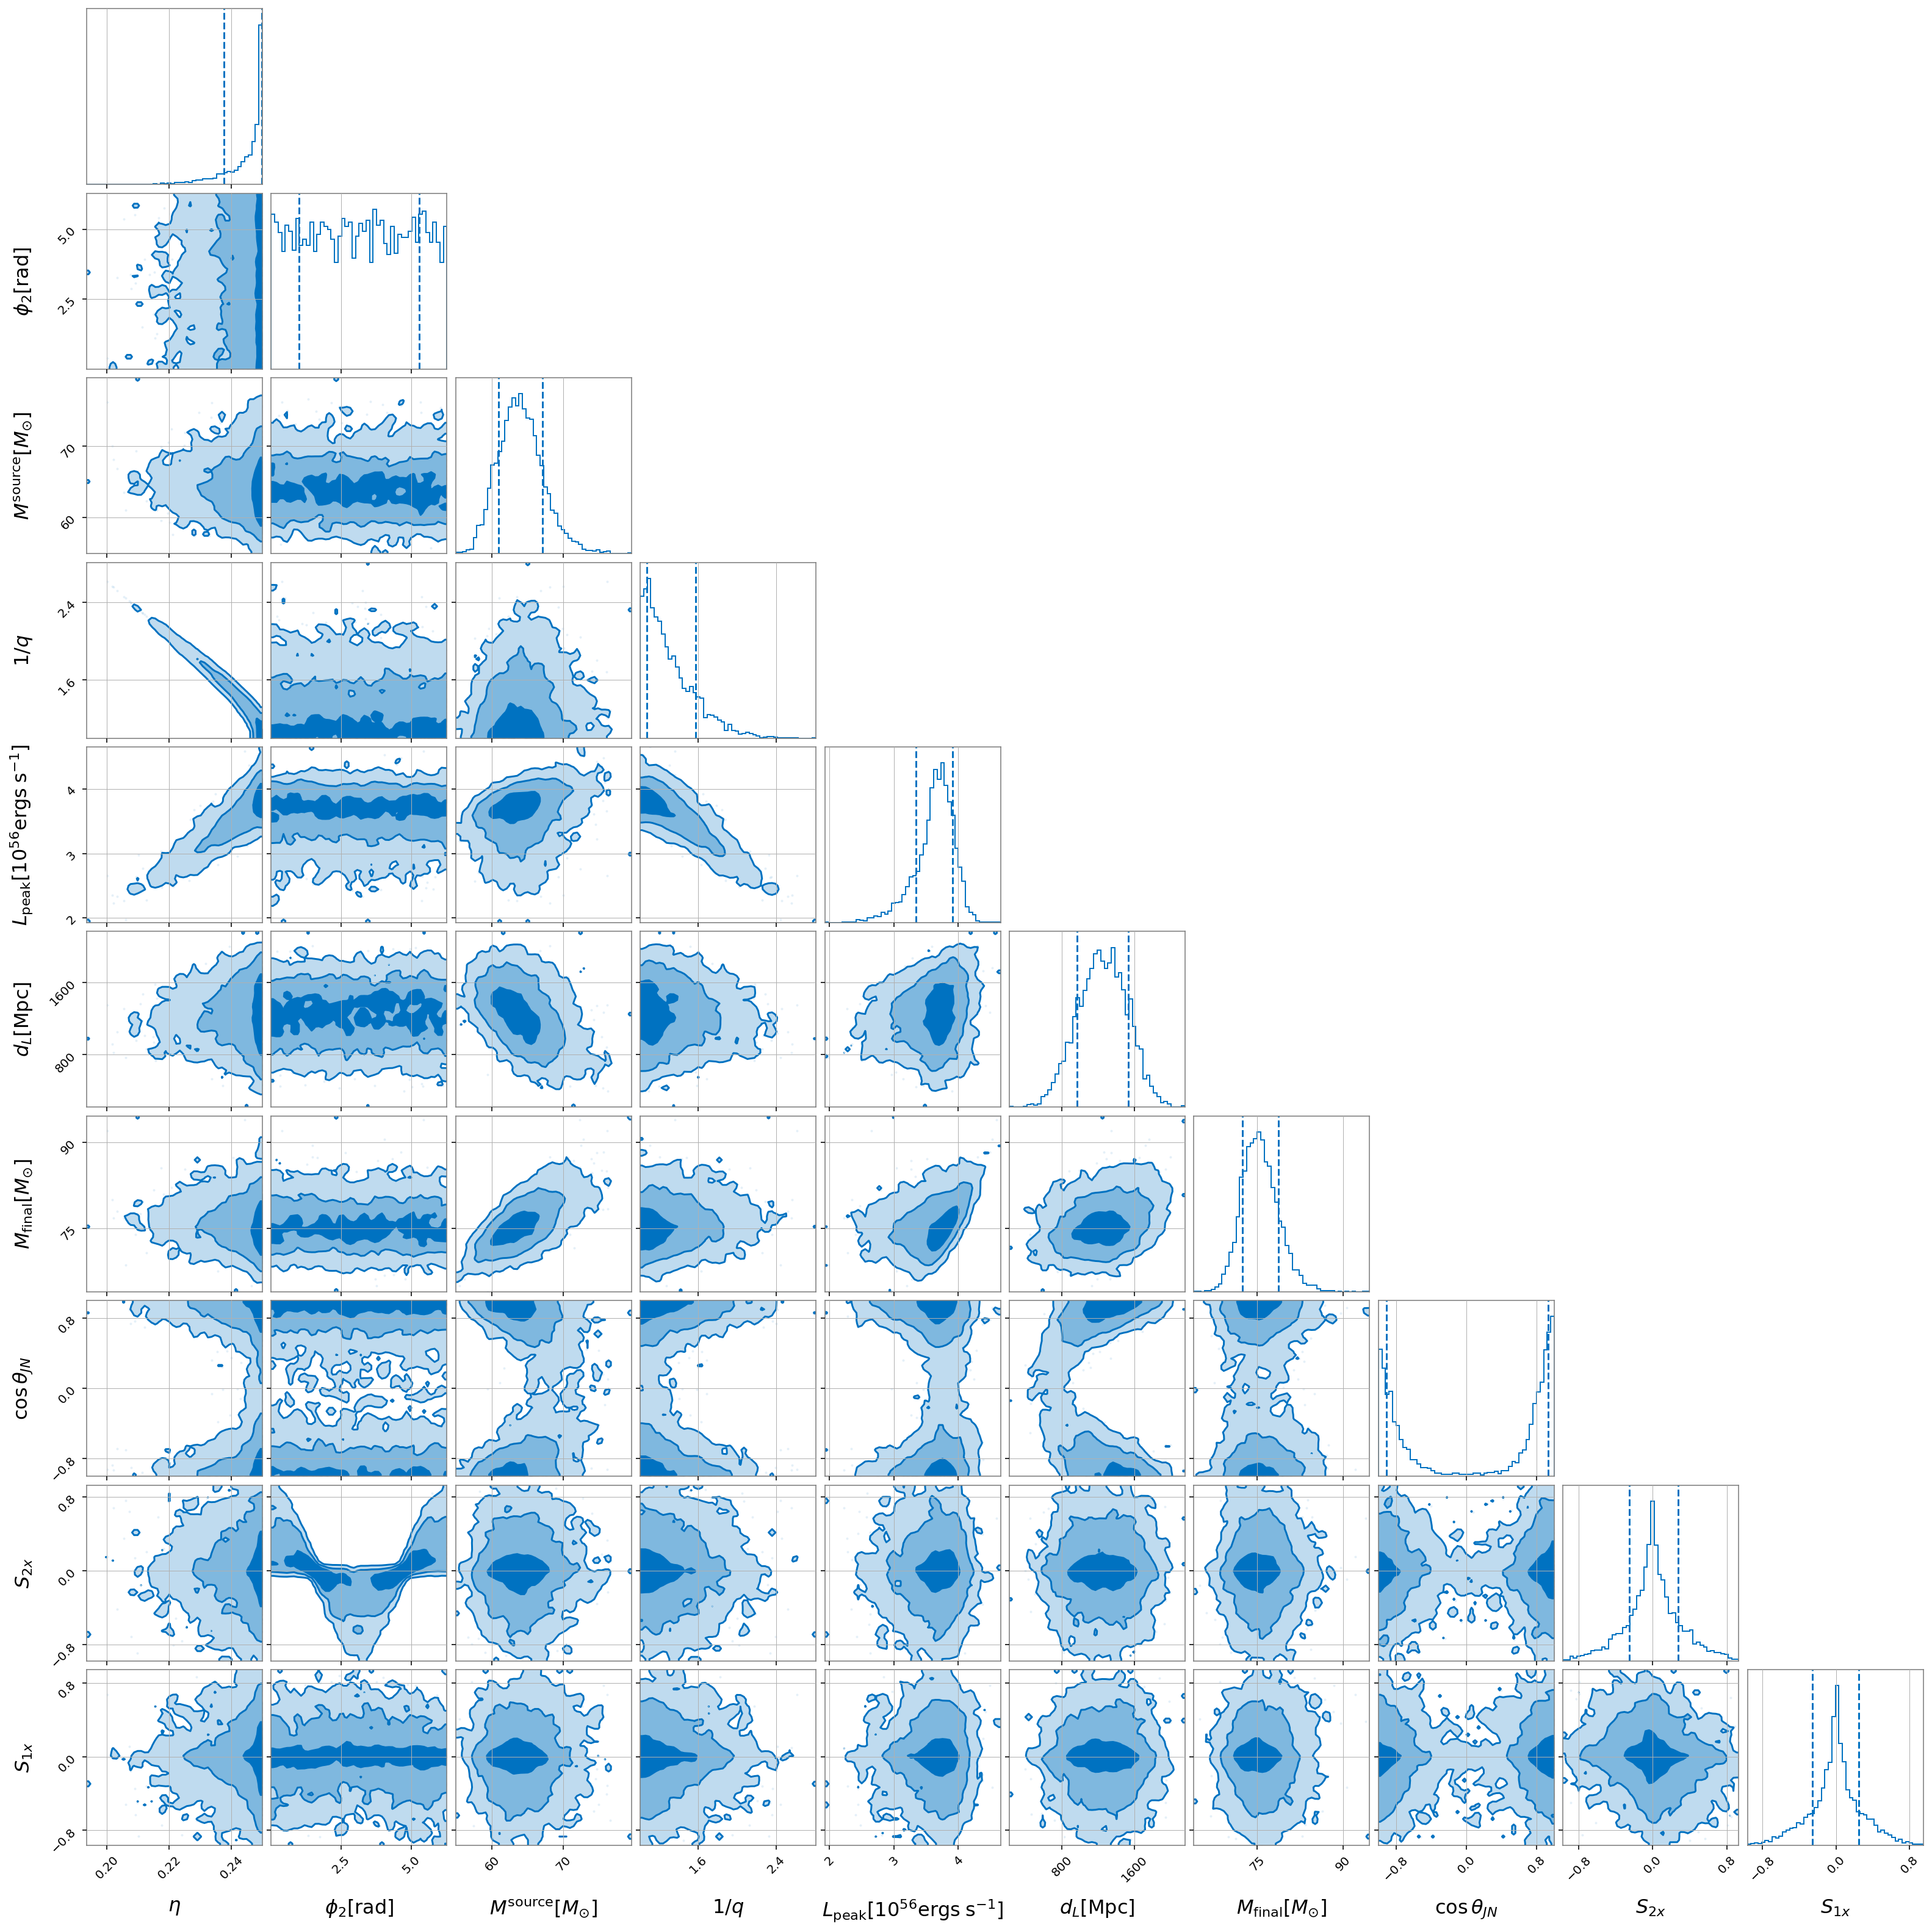

In [9]:
fig = posterior_samples.plot(type="corner",
                             parameters=parameters[:10])

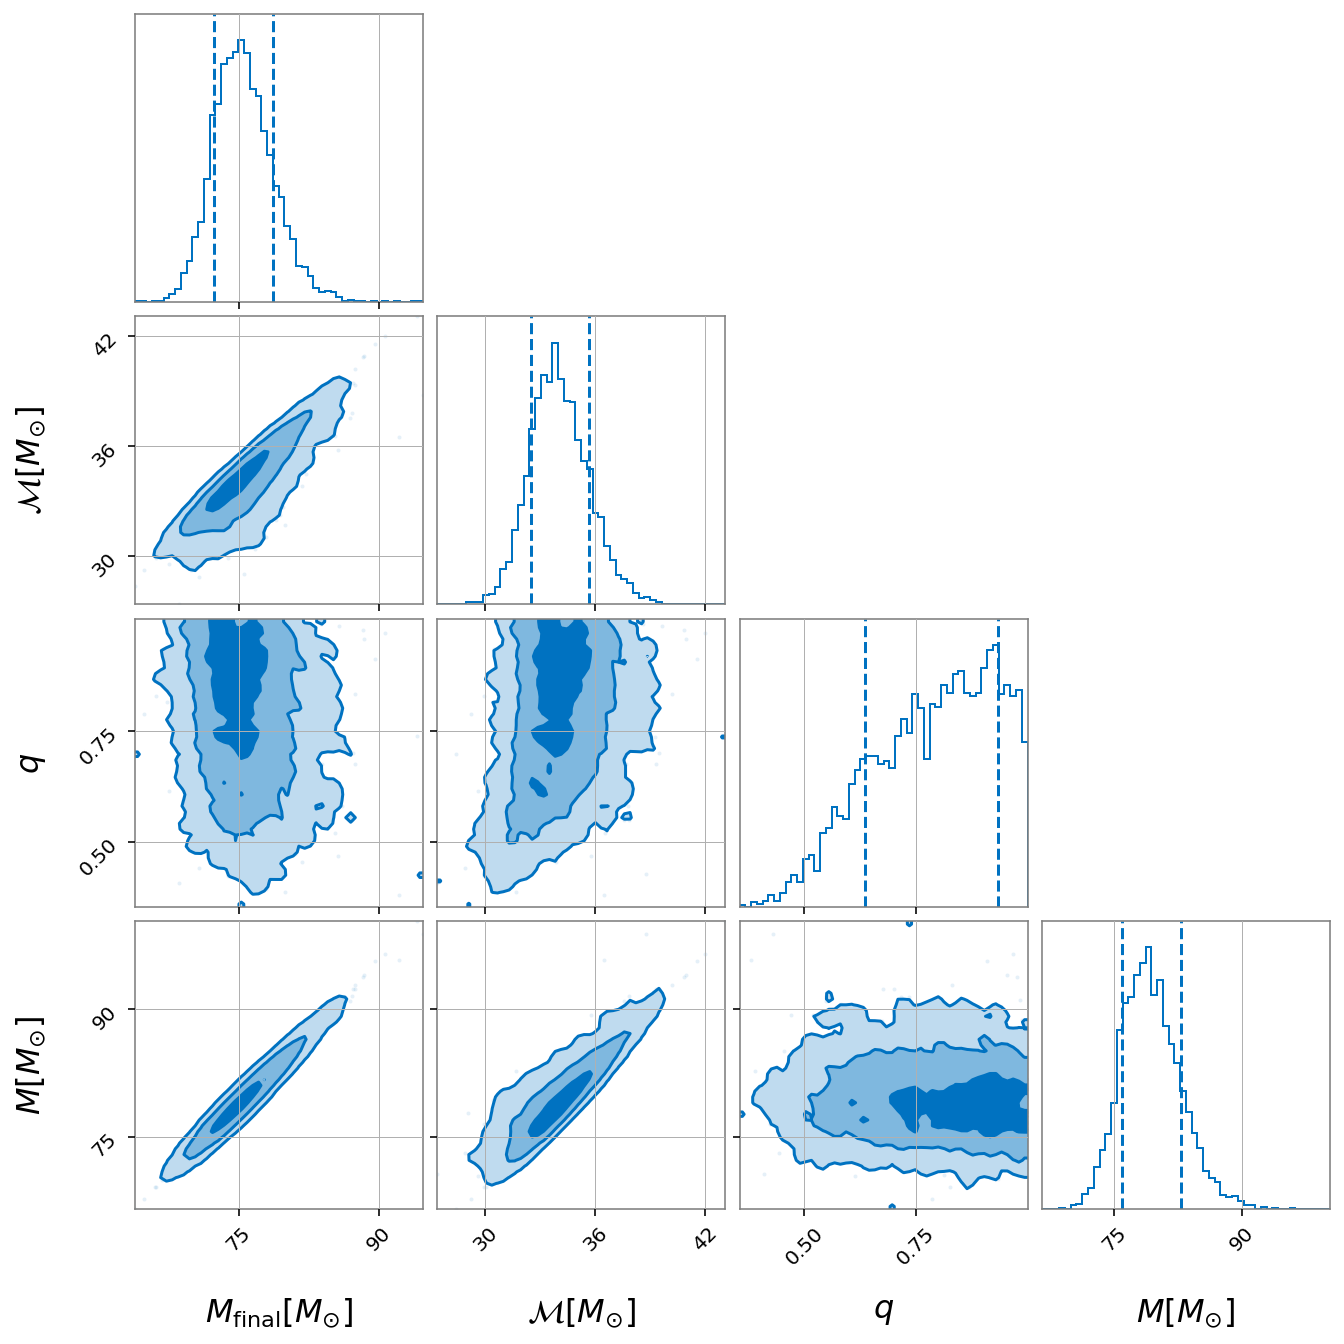

In [10]:
fig = posterior_samples.plot(type="corner",
                             parameters=["final_mass", "total_mass", "chirp_mass", "mass_ratio"])

# Remake in corner.corner

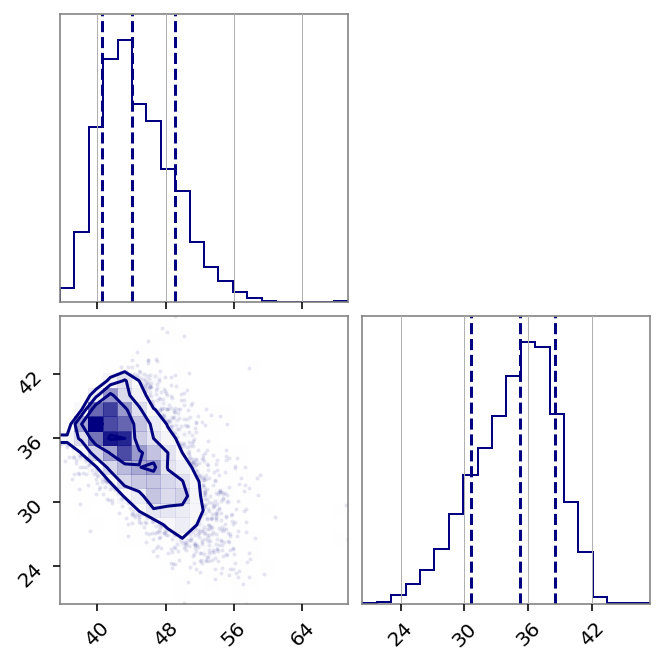

In [11]:
fig = corner.corner(np.vstack((posterior_samples["mass_1"], posterior_samples["mass_2"])).T, quantiles=[0.16, 0.5, 0.84], color="navy")

In [12]:
help(posterior_samples.plot)

Help on method plot in module pesummary.utils.samples_dict:

plot(*args, type='marginalized_posterior', **kwargs) method of pesummary.utils.samples_dict.SamplesDict instance
    Generate a plot for the posterior samples stored in SamplesDict
    
            Parameters
            ----------
            *args: tuple
                all arguments are passed to the plotting function
            type: str
                name of the plot you wish to make
            **kwargs: dict
                all additional kwargs are passed to the plotting function
            
    
    Subfunctions:
    
    pesummary.core.plots.plot._1d_histogram_plot
    --------------------------------------------
    Generate the 1d histogram plot for a given parameter for a given
        approximant.
    
        Parameters
        ----------
        param: str
            name of the parameter that you wish to plot
        samples: list
            list of samples for param
        latex_label: str
           

In [13]:
type(fig)

matplotlib.figure.Figure

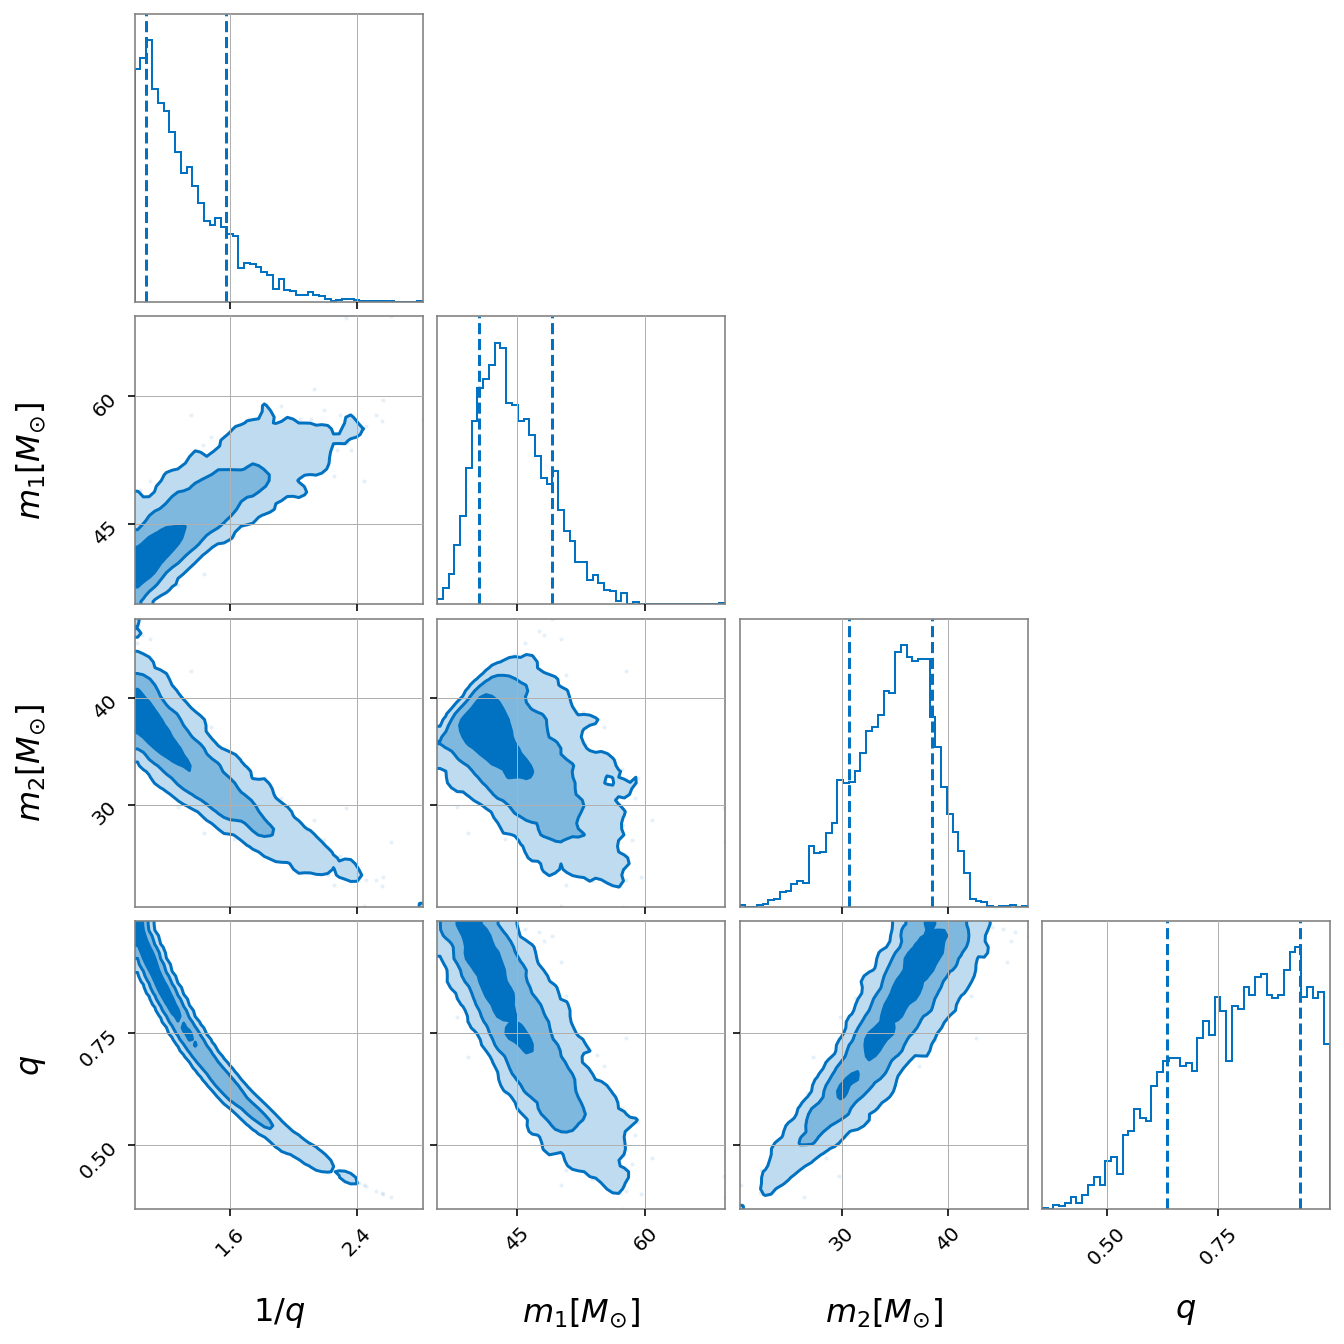

In [10]:
fig = posterior_samples.plot(type="corner",
                             parameters=["mass_1", "mass_2", "inverted_mass_ratio", "mass_ratio"])

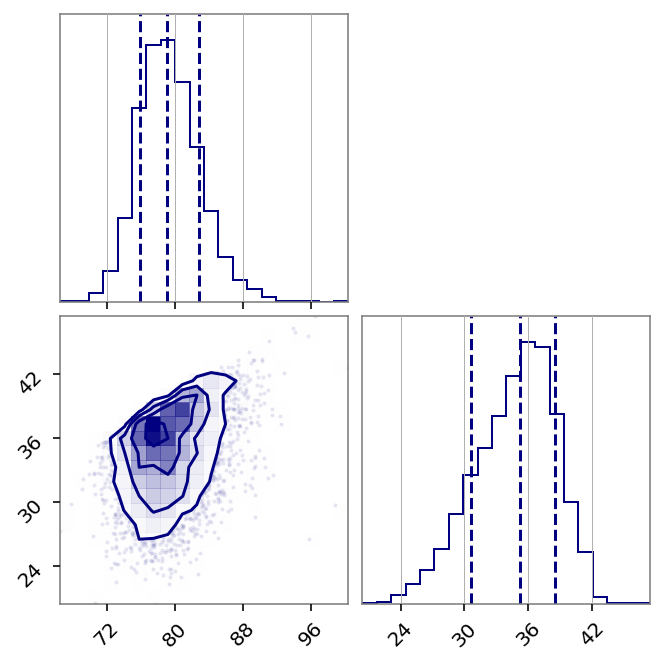

In [42]:
fig = corner.corner(np.vstack((posterior_samples["mass_1"]+posterior_samples["mass_2"], posterior_samples["mass_2"])).T, quantiles=[0.16, 0.5, 0.84], color="navy")

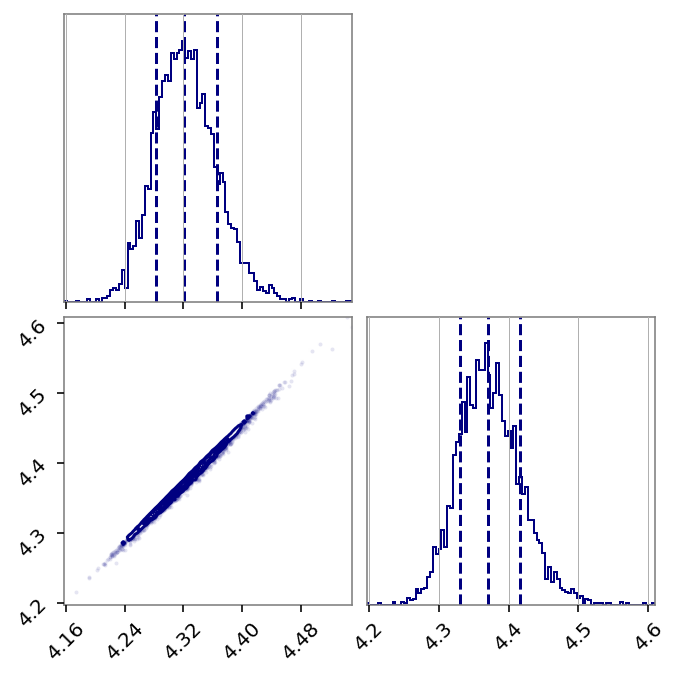

In [15]:
fig = corner.corner(np.vstack((np.log(posterior_samples["final_mass"]), np.log(posterior_samples["total_mass"]))).T, quantiles=[0.16, 0.5, 0.84], color="navy", bins=100)

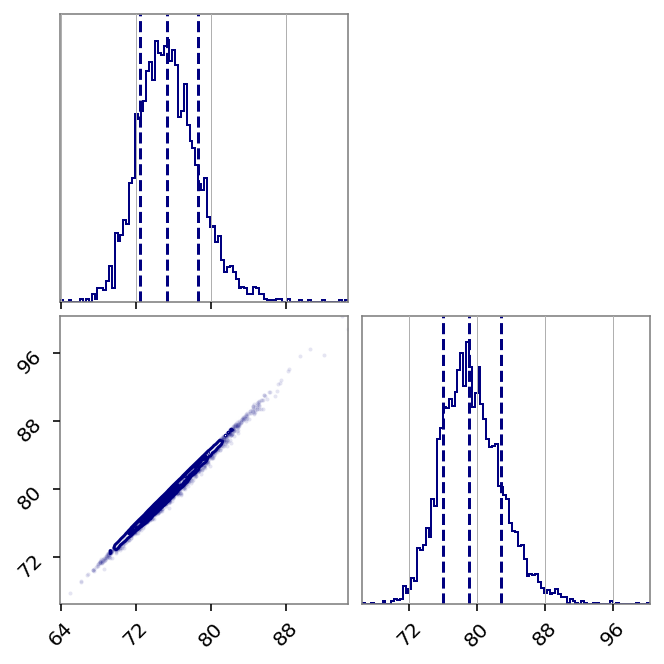

In [16]:
fig = corner.corner(np.vstack(((posterior_samples["final_mass"]), (posterior_samples["total_mass"]))).T, quantiles=[0.16, 0.5, 0.84], color="navy", bins=100)

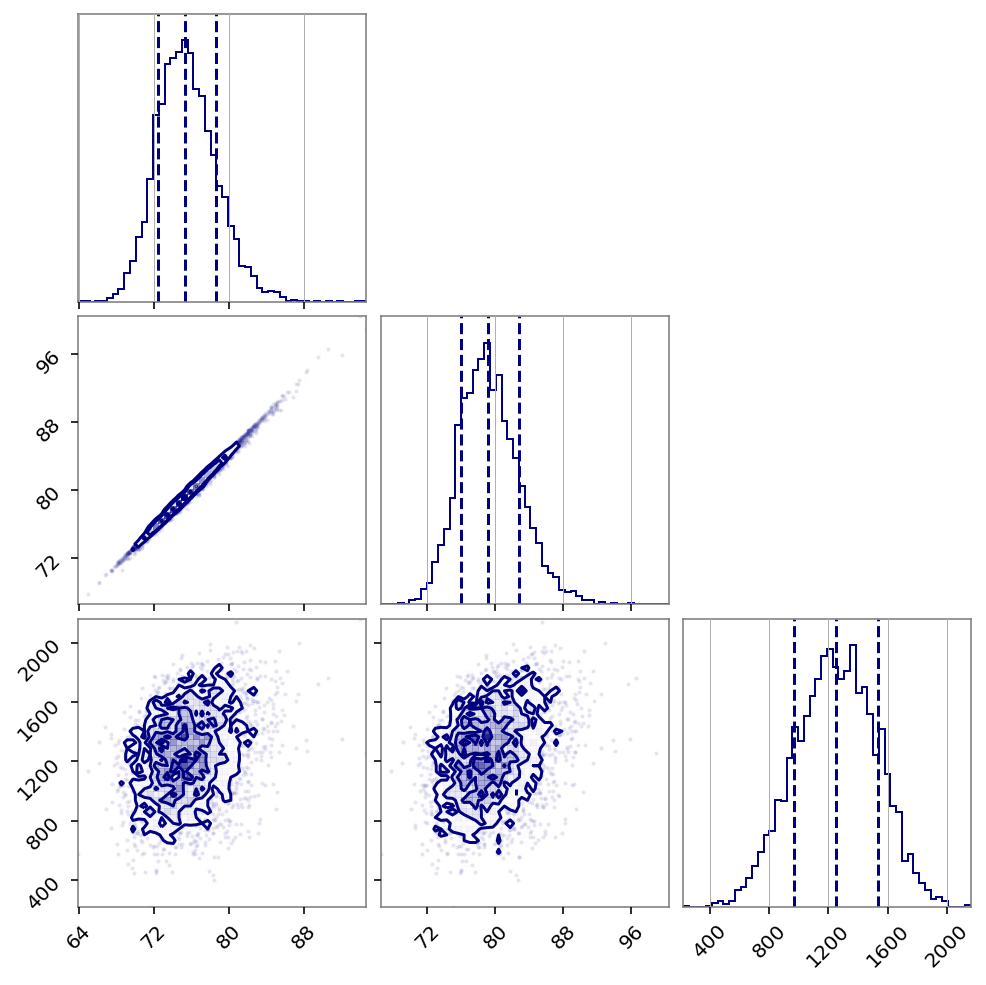

In [18]:
fig = corner.corner(np.vstack((posterior_samples["final_mass"], posterior_samples["total_mass"], posterior_samples["luminosity_distance"])).T, quantiles=[0.16, 0.5, 0.84], color="navy", bins=50)

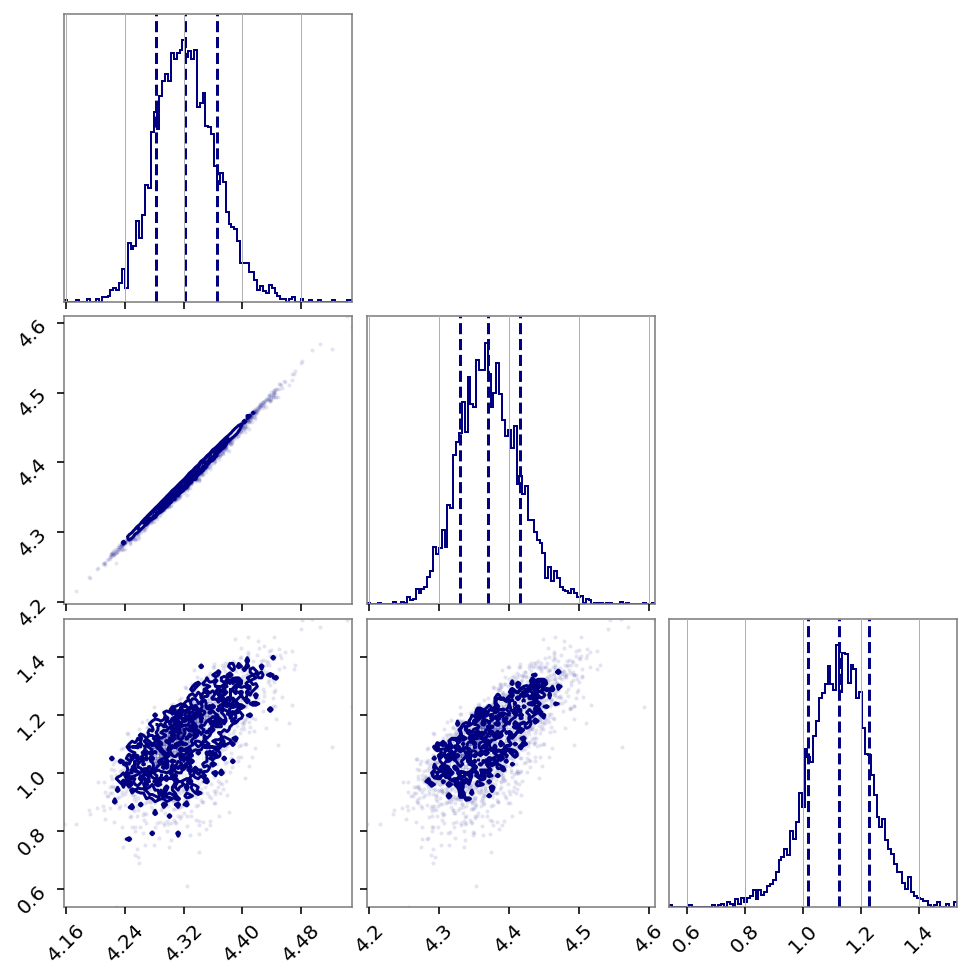

In [20]:
fig = corner.corner(np.vstack((np.log(posterior_samples["final_mass"]), np.log(posterior_samples["total_mass"]), np.log(posterior_samples["radiated_energy"]))).T, quantiles=[0.16, 0.5, 0.84], color="navy", bins=100)

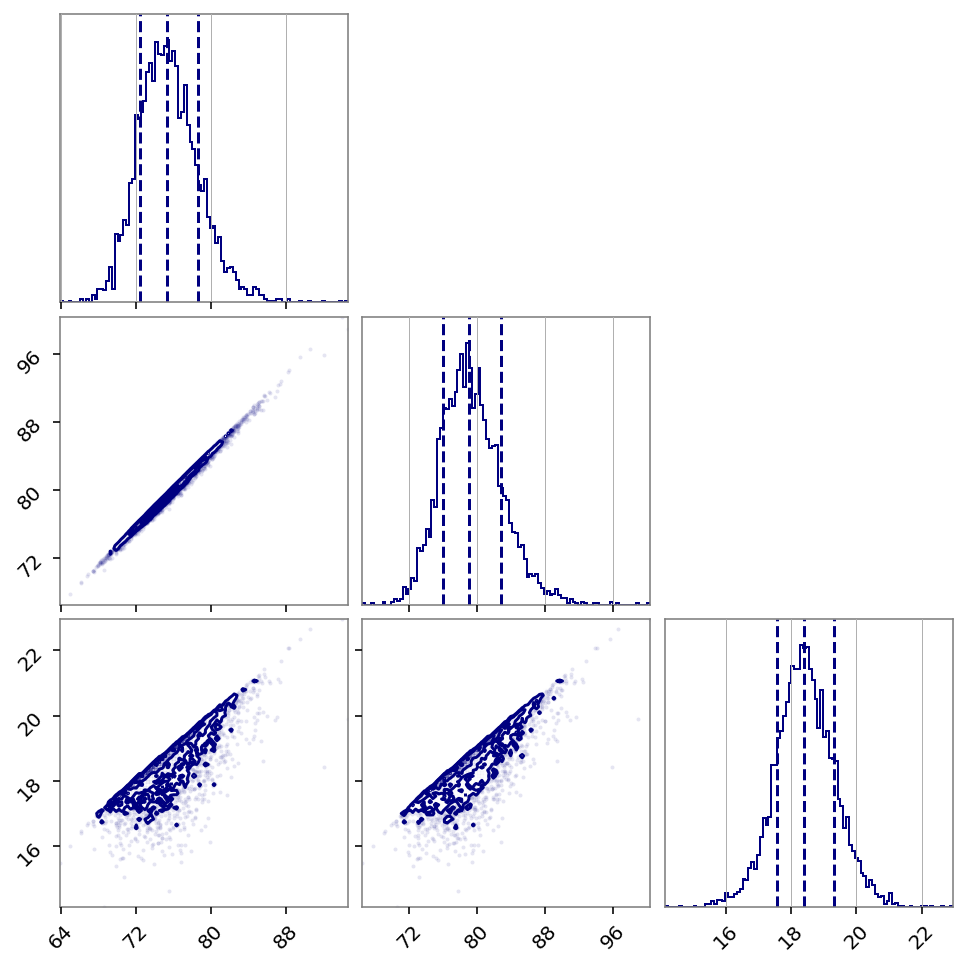

In [30]:
fig = corner.corner(np.vstack(((posterior_samples["final_mass"]), 
        (posterior_samples["total_mass"]), 
        posterior_samples["final_mass"]*(posterior_samples["mass_1"]*posterior_samples["mass_2"])/(posterior_samples["total_mass"]**2))).T, 
        quantiles=[0.16, 0.5, 0.84], color="navy", bins=100)

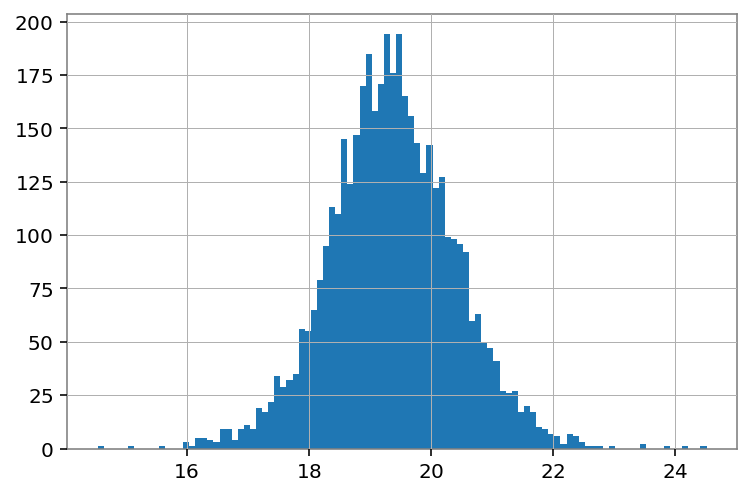

In [28]:
fig = plt.hist((posterior_samples["mass_1"]*posterior_samples["mass_2"])/(posterior_samples["total_mass"]), bins=100)

# Checking normality

In [68]:
def check_normality(samples, alpha=0.05):
    plt.figure()
    qqplot(samples, line='s')
    plt.show()

    result = shapiro(samples)
    print(result)
    if result[1] < alpha:
        print(f"Shapiro Test fail, at alpha {alpha}")

    result = normaltest(samples)
    print(result)
    if result[1] < alpha:
        print(f"D'Agostino's Test fail, at alpha {alpha}")

    result = anderson(samples)
    print(result)
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic > result.critical_values[i]:
            print(f"Anderson test fail, at alpha {sl}")


<Figure size 432x288 with 0 Axes>

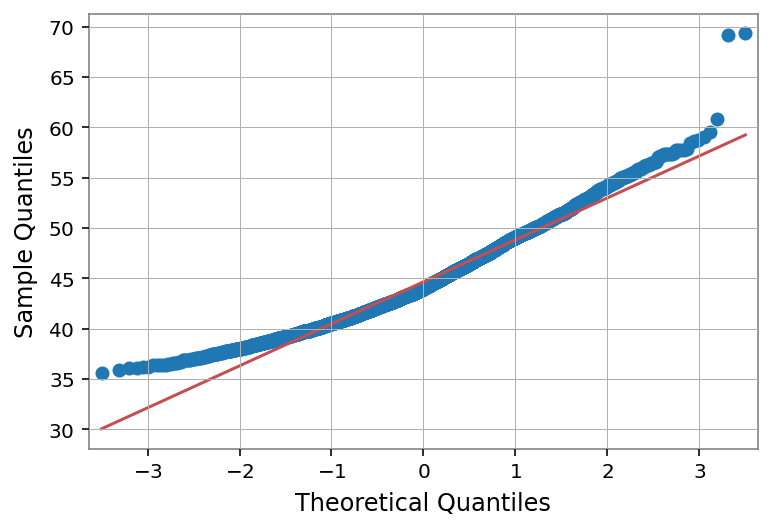

ShapiroResult(statistic=0.9717223048210144, pvalue=2.059037703598643e-28)
Shapiro Test fail, at alpha 0.05
NormaltestResult(statistic=278.5805489024664, pvalue=3.2136784685239025e-61)
D'Agostino's Test fail, at alpha 0.05
AndersonResult(statistic=29.544523075573125, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Anderson test fail, at alpha 15.0
Anderson test fail, at alpha 10.0
Anderson test fail, at alpha 5.0
Anderson test fail, at alpha 2.5
Anderson test fail, at alpha 1.0


In [69]:
check_normality(posterior_samples['mass_1'])

<Figure size 432x288 with 0 Axes>

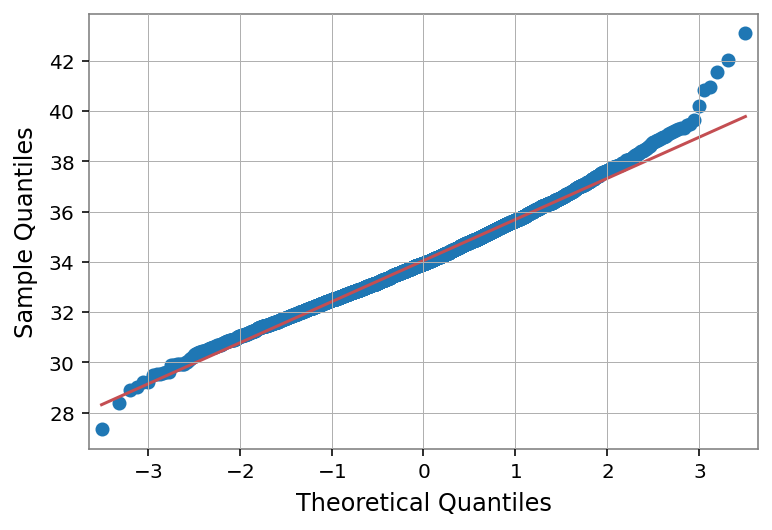

ShapiroResult(statistic=0.9919514656066895, pvalue=6.230482557152304e-15)
Shapiro Test fail, at alpha 0.05
NormaltestResult(statistic=135.32078011937304, pvalue=4.125398949477309e-30)
D'Agostino's Test fail, at alpha 0.05
AndersonResult(statistic=6.907634377156683, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Anderson test fail, at alpha 15.0
Anderson test fail, at alpha 10.0
Anderson test fail, at alpha 5.0
Anderson test fail, at alpha 2.5
Anderson test fail, at alpha 1.0


In [70]:
check_normality(posterior_samples['chirp_mass'])

In [72]:
len(posterior_samples["chirp_mass"])

4323

In [1]:
check_normality(np.random.randn(len(posterior_samples["chirp_mass"])))

NameError: name 'check_normality' is not defined

<Figure size 432x288 with 0 Axes>

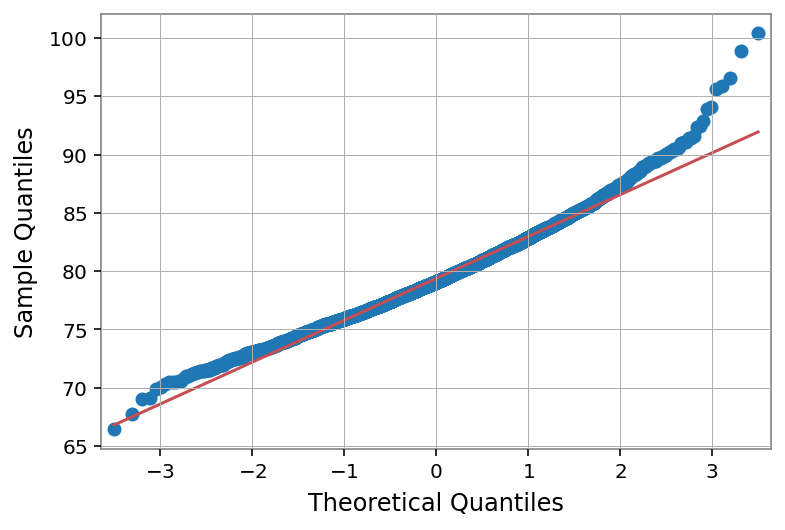

ShapiroResult(statistic=0.9850830435752869, pvalue=5.667188860011253e-21)
Shapiro Test fail, at alpha 0.05
NormaltestResult(statistic=261.97115549218546, pvalue=1.2992310046640143e-57)
D'Agostino's Test fail, at alpha 0.05
AndersonResult(statistic=11.337531825622136, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Anderson test fail, at alpha 15.0
Anderson test fail, at alpha 10.0
Anderson test fail, at alpha 5.0
Anderson test fail, at alpha 2.5
Anderson test fail, at alpha 1.0


In [93]:
check_normality(posterior_samples['total_mass'])

<Figure size 432x288 with 0 Axes>

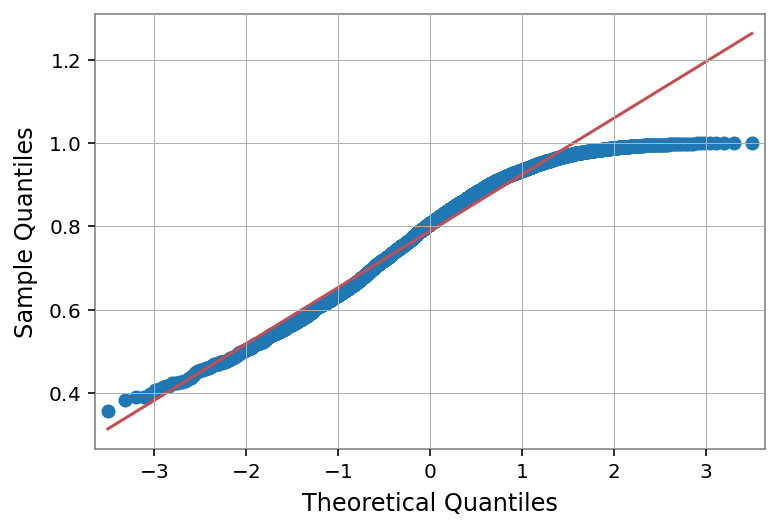

ShapiroResult(statistic=0.9626150131225586, pvalue=4.888486626715193e-32)
Shapiro Test fail, at alpha 0.05
NormaltestResult(statistic=319.68400145188383, pvalue=3.815057679058058e-70)
D'Agostino's Test fail, at alpha 0.05
AndersonResult(statistic=41.97850995426052, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Anderson test fail, at alpha 15.0
Anderson test fail, at alpha 10.0
Anderson test fail, at alpha 5.0
Anderson test fail, at alpha 2.5
Anderson test fail, at alpha 1.0


In [96]:
check_normality(posterior_samples['mass_2']/posterior_samples['mass_1'])

In [ ]:
check_normality(posterior_samples/posterior_samples)